In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from random import randrange
from wordcloud import WordCloud

In [2]:
# Baixar recursos do NLTK (se necessário)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
stopwords_especificas = [
    "vc", "voce", "vcs", "tá", "ta", "to", "tô", "pq", "q", "né", "eh", "ai", "aí", "c", "d", "já",
    "pro", "pra", "pras", "nois", "tbm", "tb", "que", "oq", "ctz", "td", "toda", "todo", "todos", "ja",
    "ate", "até", "dps", "qdo", "cm", "rt", "from", "rs", "aff", "dae", "dai", "so", "só", "la", "lá","cade",
    "xq", "x", "tam", "vlw", "obg", "ne", "n", "ñ", "nn", "nao", "sim", "s", "ss", "pfv", "pf", "plz",
    "cadê", "kd", "aki", "aqui", "ali", "dali", "naquele", "naquela", "naquilo", "aonde", "dela", "dele",
    "deles", "delas", "mt", "mto", "mtos", "mta", "mtas", "oh", "ah", "ui", "ops", "wtf", "lol", "ftw",
    "oxe", "argh", "eita", "ih", "ui", "epa", "oba", "ufa", "aham", "hmm", "hm", "hi", "hein", "puf",
    "tipo", "tipo assim", "mano", "cara", "vei", "gente", "galera", "fia", "fi", "tamo", "vamo", "bora",
    "sao", "vai", "vem", "aonde", "donde", "onde", "aqui", "dali", "ma", "meu", "minha", "nosso", "nossa"
]

stopwords_tradicionais = set(stop_words)

stopwords_especificas = set(stopwords_especificas)

STOPWORDS_COMPLETA = stopwords_tradicionais.union(stopwords_especificas)

In [4]:
def remover_palavras_exatas(texto: str, palavras: list[str]) -> str:
    """
    Remove palavras exatas do texto usando regex, sem remover substrings.

    Args:
        texto (str): Texto de entrada.
        palavras (list[str]): Lista de palavras a remover (exatamente).

    Returns:
        str: Texto com as palavras removidas.
    """
    for palavra in palavras:
        # Remove a palavra com delimitador de palavra (\b) e insensível a maiúsculas
        padrao = rf'\b{re.escape(palavra)}\b'
        texto = re.sub(padrao, '', texto, flags=re.IGNORECASE)

    # Limpa múltiplos espaços e espaços antes de pontuação
    texto = re.sub(r'\s{2,}', ' ', texto)
    texto = re.sub(r'\s+([,.!?;:])', r'\1', texto)

    return texto.strip()

In [4]:
# 2. Pré-processamento (corrigido) [99%]
import unicodedata
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_text(text):
    '''
    Perform stop-words removal and lemmatization
    '''

    text = str(text)

    text = text.lower()

    text_normalize = unicodedata.normalize("NFKD", text)
    text = ''.join(
        char for char in text_normalize
        if not unicodedata.combining(char)
    )

    text = text.encode('ascii', 'ignore').decode('utf-8')

    words = text.split()
    for word in words:
        if re.search('http', word) or re.search('https', word):
            text = text.replace(word, '')

        if re.search('@', word) or re.search('#', word):
            text = text.replace(word, '')

        if re.search('kk', word) or re.search("hah", word) or re.search('aha', word):
            text = text.replace(word, '')

    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    words = [word for word in text.split() if (word not in STOPWORDS_COMPLETA)]
    words = [WordNetLemmatizer().lemmatize(word) for word in words]

    return " ".join(words)

In [ ]:
#Criação de Datasets limpos
import os
import re

pasta_atual = os.getcwd()
print(pasta_atual)

if not os.path.exists("Datasets Limpos"):
    os.mkdir("Datasets Limpos")
    

c:\Users\aluno\Desktop\12-09\TCC-Disurso-de-Odio\códigos


In [ ]:
datasets = [
    'Datasets/OLID - BR/2019-05-28_portuguese_hate_speech_binary_classification.csv',
    'Datasets/OffComBR-3/OffComBR3.csv',
    'Datasets/Offcom2/OffComBR2.csv',
    'Datasets/ToLD/ToLD-BR_binario.csv',
    'Datasets/hateBR/HateBR.csv'
]

text=['text','mensagem','comentario','text','comentario']
label = ['hatespeech_comb','label','label','Discurso_de_odio','label_final']
for dataset,label in zip(datasets,label) :
  df = pd.read_csv(dataset)
  print("Coleção de dados : {}\nShape : {}\nInstâncias : {}\n\n".format(
      dataset.split('/')[-1],
      df.shape,
      df[label].value_counts()
      ))


Coleção de dados : 2019-05-28_portuguese_hate_speech_binary_classification.csv
Shape : (5670, 8)
Instâncias : hatespeech_comb
0    3882
1    1788
Name: count, dtype: int64


Coleção de dados : OffComBR3.csv
Shape : (1033, 2)
Instâncias : label
no     831
yes    202
Name: count, dtype: int64


Coleção de dados : OffComBR2.csv
Shape : (1250, 2)
Instâncias : label
no     831
yes    419
Name: count, dtype: int64


Coleção de dados : ToLD-BR_binario.csv
Shape : (21000, 15)
Instâncias : Discurso_de_odio
0    11742
1     9258
Name: count, dtype: int64


Coleção de dados : HateBR.csv
Shape : (7000, 8)
Instâncias : label_final
1    3500
0    3500
Name: count, dtype: int64




In [62]:
import random
for text_,dataset in zip(text,datasets):
  df = pd.read_csv(dataset)
  texto = df[text_]
  texto = texto[random.randrange(len(df))]
  limpo = clean_text(texto)
  print("Texto Original : {}\nTexto Limpo : {}\n\n".format(texto,limpo))


Texto Original : @agnaldoregojr 
2) O fato de o cidadão de bem passar a portar uma arma não o transformará em bandido.
Crime é questão de índole!
Texto Limpo : 2 fato cidadao bem passar portar arma transformara bandido crime questao indole


Texto Original : 'VAMOS MASSA ATLETICANA LOTAR O MINEIRAO E APOIA O PRATTO'
Texto Limpo : vamos massa atleticana lotar mineirao apoia pratto


Texto Original : 'Junta todos os pontas do Fla que nao da um Cueva'
Texto Limpo : junta pontas fla cueva


Texto Original : rt @user torpedo russo na red burro pra ontem https://t.co/v3a4kixheu
Texto Limpo : torpedo russo red burro ontem


Texto Original : Que homens lindos 😍😍 maravilhosos, inteligentes, queridos!
Texto Limpo : homens lindos maravilhosos inteligentes queridos




In [ ]:
import pandas as pd
import numpy as np

# Lista de datasets e suas respectivas colunas
datasets = [
    'Datasets/OLID - BR/2019-05-28_portuguese_hate_speech_binary_classification.csv',
    'Datasets/OffComBR-3/OffComBR3.csv',
    'Datasets/Offcom2/OffComBR2.csv',
    'Datasets/ToLD/ToLD-BR_binario.csv',
    'Datasets/hateBR/HateBR.csv'
]

text_columns = ['text', 'mensagem', 'comentario', 'text', 'comentario']
label_columns = ['hatespeech_comb', 'label', 'label', 'Discurso_de_odio', 'label_final']

results = []

for i, dataset_path in enumerate(datasets):
    try:
        # Ler o dataset
        df = pd.read_csv(dataset_path)
        
        # Obter colunas de texto e label
        text_col = text_columns[i]
        label_col = label_columns[i]
        
        # Calcular estatísticas
        num_instances = len(df)
        
        # Tamanho médio em palavras
        avg_word_length = df[text_col].apply(lambda x: len(str(x).split())).mean()
        
        # Tamanho médio em caracteres
        avg_char_length = df[text_col].apply(lambda x: len(str(x))).mean()
        
        # Número de classes
        num_classes = df[label_col].nunique()
        
        # Distribuição de classes
        class_distribution = df[label_col].value_counts().to_dict()
        
        # Formatar distribuição para melhor visualização
        dist_str = ", ".join([f"{k}: {v}" for k, v in class_distribution.items()])
        
        results.append({
            'Dataset': dataset_path.split('/')[1],
            '# Instâncias': num_instances,
            'Tamanho Médio (palavras)': round(avg_word_length, 2),
            'Tamanho Médio (caracteres)': round(avg_char_length, 2),
            '# Classes': num_classes,
            'Distribuição de Classes': dist_str
        })
        
    except Exception as e:
        print(f"Erro ao processar {dataset_path}: {str(e)}")

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
print(results_df)

# Salvar resultados em CSV
results_df.to_csv('estatisticas_datasets.csv', index=False)

Erro ao processar Datasets/OffComBR-3/OffComBR3.csv: 'anotador1-L嫙aro'
Erro ao processar Datasets/OffComBR-3/Multiclasse - OffComBR3.csv: 'utf-8' codec can't decode byte 0xe1 in position 17: invalid continuation byte
     Dataset  # Instâncias  Tamanho Médio (palavras)  \
0  OLID - BR          5670                     15.81   
1    Offcom2          1250                     13.21   
2       ToLD         21000                     15.62   
3     hateBR          7000                     13.93   

   Tamanho Médio (caracteres)  # Classes Distribuição de Classes  
0                      101.35          2        0: 3882, 1: 1788  
1                       74.56          2       no: 831, yes: 419  
2                       87.02          2       0: 11742, 1: 9258  
3                       81.96          2        1: 3500, 0: 3500  


In [ ]:
# 2.1. Data Frame Treatment & Training and Matching Separation
import pandas as pd
import re
from sklearn.model_selection import train_test_split

def load_and_prepare_data(filepath, text_colum, label_colum):
    """Carrega e prepara os dados"""
    # Carregar dados
    df_TextLabel = pd.read_csv(filepath)

    # Limpar textos
    df_TextLabel['cleaned_text'] = df_TextLabel[text_colum].apply(clean_text)

    # Filtrar colunas necessárias
    df_TextLabel = df_TextLabel[['cleaned_text', label_colum]]
    df_TextLabel.columns = ['text', 'label']

    # Remover linhas vazias
    df_TextLabel = df_TextLabel.dropna()
    df_TextLabel = df_TextLabel[df_TextLabel['text'] != '']

    return df_TextLabel

def split_data(df_TextLabel):
    """Divide os dados em treino e teste"""
    text_var = df_TextLabel['text']
    label_var = df_TextLabel['label']
    return train_test_split(text_var, label_var, test_size=0.2, random_state=42)

In [57]:
import pandas
len(pandas.read_csv(dataset)[text_])

7000

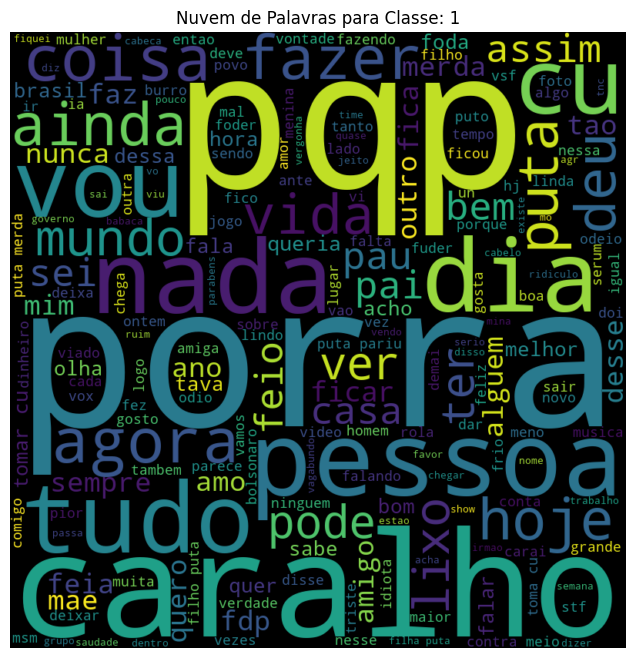

In [9]:
# 2.2.1. Data Exploration & Visualization (Word Cloud)
import pandas as pd
import re
from sklearn.model_selection import train_test_split

classes = df['label'].unique()
random_class = classes[randrange(len(classes))]

class_text = ' '.join(df[df['label'] == random_class]['text'])
class_text = ' '.join(df['text'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=800,
                         background_color='black',
                         stopwords="portuguese",
                         collocations=True).generate(class_text)

# Plotar
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nuvem de Palavras para Classe: {random_class}')
plt.show()

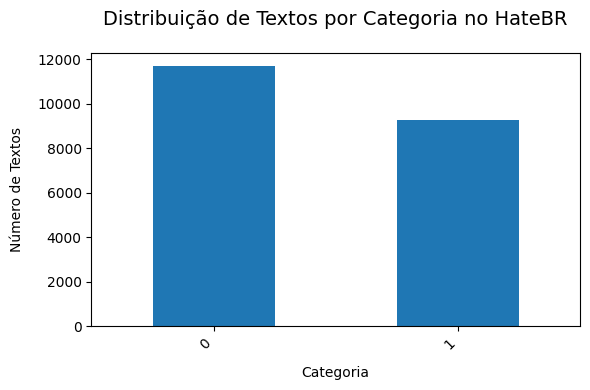

In [10]:
# 2.2.2. Visualisation (Visualizing word count balance in bar chart) [99%]

category_column = "label"

# Criando o gráfico
plt.figure(figsize=(6, 4))

# Contando os textos por categoria e plotando
df.groupby(category_column).size().sort_values(ascending=False).plot.bar(color='#1f77b4')

# Adicionando título e labels
plt.title("Distribuição de Textos por Categoria no HateBR", pad=20, fontsize=14)
plt.xlabel("Categoria", labelpad=10)
plt.ylabel("Número de Textos", labelpad=10)
plt.xticks(rotation=45, ha='right')

# Ajustando layout para não cortar rótulos
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [7]:
import pandas as pd
import re
import unicodedata
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time

# Download dos recursos do NLTK se necessário
try:
    from nltk.corpus import stopwords
except ImportError:
    import nltk
    nltk.download('stopwords')
    nltk.download('wordnet')
    from nltk.corpus import stopwords


def train_and_evaluate_classifiers(datasets_configs, classifiers):
    """
    Treina e avalia múltiplos classificadores em múltiplos datasets de forma eficiente
    """
    results = {}
    
    for dataset_config in datasets_configs:
        dataset_name = dataset_config.get("name", "unknown_dataset")
        print(f"\n{'='*50}")
        print(f"Processando dataset: {dataset_name}")
        print(f"{'='*50}")
        
        try:
            # Carrega e prepara os dados
            start_time = time.time()
            df = load_and_prepare_data(
                dataset_config["filepath"],
                dataset_config["text_column"],
                dataset_config["label_column"]
            )
            load_time = time.time() - start_time
            print(f"Dados carregados em {load_time:.2f}s - {len(df)} amostras")
            
            # Divide os dados
            text_train, text_test, label_train, label_test = split_data(df)
            
            # Vectorização TF-IDF (apenas uma vez por dataset)
            start_time = time.time()
            tfidf_vectorizer = TfidfVectorizer(
                min_df=5, 
                ngram_range=(1, 2),
                max_features=10000
            )
            X_train = tfidf_vectorizer.fit_transform(text_train)
            X_test = tfidf_vectorizer.transform(text_test)
            vectorization_time = time.time() - start_time
            print(f"Vectorização concluída em {vectorization_time:.2f}s - {X_train.shape[1]} features")
            
            # Treina e avalia cada classificador
            for classifier in classifiers:
                classifier_name = classifier.__class__.__name__
                print(f"\nTreinando {classifier_name}...")
                
                # Treina o classificador
                start_time = time.time()
                classifier.fit(X_train, label_train)
                train_time = time.time() - start_time
                
                # Faz predições
                start_time = time.time()
                predictions = classifier.predict(X_test)
                predict_time = time.time() - start_time
                
                # Calcula métricas
                accuracy = accuracy_score(label_test, predictions)
                f1 = f1_score(label_test, predictions, average='weighted')
                
                # Armazena resultados
                if dataset_name not in results:
                    results[dataset_name] = {}
                
                results[dataset_name][classifier_name] = {
                    'accuracy': accuracy,
                    'f1_score': f1,
                    'train_time': train_time,
                    'predict_time': predict_time,
                    'model': classifier,
                    'vectorizer': tfidf_vectorizer,
                    'predictions': predictions,
                    'true_labels': label_test.values
                }
                
                print(f"  Acurácia: {accuracy:.4f}")
                print(f"  F1-Score: {f1:.4f}")
                print(f"  Tempo total: {train_time+predict_time:.2f}s")
                
        except Exception as e:
            print(f"Erro ao processar dataset {dataset_name}: {str(e)}")
            continue
    
    return results

# Configurações dos datasets
datasets = [
    {  # HateBR
        "name": "HateBR",
        "filepath": 'Datasets/hateBR/HateBR.csv',
        "text_column": 'comentario',
        "label_column": 'label_final'
    },
    {  # Offcom2
        "name": "Offcom2",
        "filepath": 'Datasets/OffComBR-3/OffComBR3.csv',
        "text_column": 'comentario',
        "label_column": 'label'
    },
    {  # OffcomBR-3
        "name": "OffcomBR-3",
        "filepath": 'Datasets/Offcom2/OffComBR2.csv',
        "text_column": 'mensagem',
        "label_column": 'label'
    },
    {  # OLID-BR 
        "name": "OLID-BR",
        "filepath": 'Datasets/OLID - BR/2019-05-28_portuguese_hate_speech_binary_classification.csv',
        "text_column": 'text',
        "label_column": 'hatespeech_comb'
    },
    {  # BiToLD
        "name": "BiToLD",
        "filepath": 'Datasets/ToLD/ToLD-BR_binario.csv',
        "text_column": 'text',
        "label_column": 'Discurso_de_odio'
    },
]

# Classificadores (instanciados com parâmetros otimizados)
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    LinearSVC(random_state=42, max_iter=1000),
    LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1)
]

# Executa treinamento e avaliação
if __name__ == "__main__":
    print("Iniciando processo de treinamento e avaliação...")
    results = train_and_evaluate_classifiers(datasets, classifiers)
    
    # Exibe resultados resumidos
    print("\n\n" + "="*60)
    print("RESUMO FINAL DOS RESULTADOS")
    print("="*60)
    
    for dataset_name, dataset_results in results.items():
        print(f"\nDataset: {dataset_name}")
        print("-" * 40)
        for classifier_name, metrics in dataset_results.items():
            print(f"{classifier_name:25} | Acurácia: {metrics['accuracy']:.4f} | F1: {metrics['f1_score']:.4f} | Tempo: {metrics['train_time']+metrics['predict_time']:.2f}s")
    
    # Salva resultados em arquivo CSV
    results_df = pd.DataFrame()
    for dataset_name, dataset_results in results.items():
        for classifier_name, metrics in dataset_results.items():
            results_df = pd.concat([results_df, pd.DataFrame({
                'Dataset': [dataset_name],
                'Classificador': [classifier_name],
                'Acurácia': [metrics['accuracy']],
                'F1-Score': [metrics['f1_score']],
                'Tempo_Treino': [metrics['train_time']],
                'Tempo_Predicao': [metrics['predict_time']]
            })], ignore_index=True)
    
    results_df.to_csv('resultados_classificacao.csv', index=False)
    print("\nResultados salvos em 'resultados_classificacao.csv'")

Iniciando processo de treinamento e avaliação...

Processando dataset: HateBR
Limpando textos...
Textos limpos em 0.46 segundos
Dados carregados em 0.52s - 6990 amostras
Vectorização concluída em 0.42s - 1889 features

Treinando MultinomialNB...
  Acurácia: 0.8176
  F1-Score: 0.8175
  Tempo total: 0.01s

Treinando RandomForestClassifier...
  Acurácia: 0.7897
  F1-Score: 0.7898
  Tempo total: 1.32s

Treinando LinearSVC...
  Acurácia: 0.8262
  F1-Score: 0.8262
  Tempo total: 0.02s

Treinando LogisticRegression...
  Acurácia: 0.8190
  F1-Score: 0.8191
  Tempo total: 10.97s

Treinando KNeighborsClassifier...
  Acurácia: 0.6753
  F1-Score: 0.6753
  Tempo total: 0.42s

Processando dataset: Offcom2
Limpando textos...
Erro ao processar dataset Offcom2: 'comentario'

Processando dataset: OffcomBR-3
Limpando textos...
Erro ao processar dataset OffcomBR-3: 'mensagem'

Processando dataset: OLID-BR
Limpando textos...
Textos limpos em 0.42 segundos
Dados carregados em 0.47s - 5668 amostras
Vectoriza

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
import time

def train_and_evaluate_classifiers(datasets_configs, classifiers):
    """
    Treina e avalia múltiplos classificadores em múltiplos datasets de forma eficiente
    
    Args:
        datasets_configs: Lista de dicionários com configurações dos datasets
        classifiers: Lista de classificadores (já instanciados)
    
    Returns:
        Dicionário com resultados detalhados
    """
    results = {}
    
    for dataset_config in datasets_configs:
        dataset_name = dataset_config.get("name", "unknown_dataset")
        print(f"Processando dataset: {dataset_name}")
        
        # Carrega e prepara os dados
        df = load_and_prepare_data(
            dataset_config["filepath"],
            dataset_config["text_column"],
            dataset_config["label_column"]
        )
        
        # Divide os dados
        text_train, text_test, label_train, label_test = split_data(df)
        
        # Vectorização TF-IDF (apenas uma vez por dataset)
        tfidf_vectorizer = TfidfVectorizer(
            min_df=5, 
            ngram_range=(1, 2),
            max_features=10000 
        )
        X_train = tfidf_vectorizer.fit_transform(text_train)
        X_test = tfidf_vectorizer.transform(text_test)
        
        # Treina e avalia cada classificador
        for classifier in classifiers:
            classifier_name = classifier.__class__.__name__
            
            # Treina o classificador
            classifier.fit(X_train, label_train)
            
            # Faz predições
            predictions = classifier.predict(X_test)
            
            # Calcula métricas
            accuracy = accuracy_score(label_test, predictions)
            f1 = f1_score(label_test, predictions, average='weighted')
            
            # Armazena resultados
            if dataset_name not in results:
                results[dataset_name] = {}
            
            results[dataset_name][classifier_name] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'model': classifier,
                'vectorizer': tfidf_vectorizer
            }
    
    return results

# Exemplo de uso:
if __name__ == "__main__":
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    
    # Configurações dos datasets
    datasets_configs = [
        {
            "name": "meu_dataset",
            "filepath": "dados.csv",
            "text_column": "texto",
            "label_column": "rotulo"
        }
    ]
    
    # Classificadores (já instanciados com parâmetros)
    classifiers = [
        RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        SVC(kernel='linear', random_state=42),
        LogisticRegression(random_state=42, n_jobs=-1)
    ]
    
    # Executa treinamento e avaliação
    results = train_and_evaluate_classifiers(datasets_configs, classifiers)
    
    # Exibe resultados resumidos
    print("\n=== RESUMO DOS RESULTADOS ===")
    for dataset_name, dataset_results in results.items():
        print(f"\nDataset: {dataset_name}")
        for classifier_name, metrics in dataset_results.items():
            print(f"  {classifier_name}: Acurácia={metrics['accuracy']:.4f}, F1={metrics['f1_score']:.4f}")

In [ ]:
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


def load_and_prepare_data(filepath, text_column, label_column):
    # Implementação básica - ajuste conforme seu cenário
    df = pd.read_csv(filepath)
    texts = df[text_column].values
    labels = df[label_column].values
    return texts, labels

def split_data(texts, labels, test_size=0.2, random_state=42):
    return train_test_split(texts, labels, test_size=test_size, random_state=random_state)

def train_and_predict(text_train, text_test, label_train, classifier):
    tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
    X_train_vectorized = tfidf_vectorizer.fit_transform(text_train)
    X_test_vectorized = tfidf_vectorizer.transform(text_test)
    
    classifier_model = classifier.fit(X_train_vectorized, label_train)
    return classifier_model.predict(X_test_vectorized)

def result(datasets_dicts, classifiers):
    results = {}
    
    for dataset_dict in datasets_dicts:
        # Carrega e prepara os dados uma vez por dataset
        texts, labels = load_and_prepare_data(
            dataset_dict["filepath"],
            dataset_dict["text_column"],
            dataset_dict["label_column"]
        )
        
        # Split dos dados uma vez por dataset
        text_train, text_test, label_train, label_test = split_data(texts, labels)
        
        for classifier in classifiers:
            # Usa a mesma base de dados pré-processada para todos os classificadores
            predictions = train_and_predict(text_train, text_test, label_train, classifier)
            
            # Calcula métricas
            accuracy = accuracy_score(label_test, predictions)
            f1 = f1_score(label_test, predictions, average='weighted')
            
            # Armazena resultados
            classifier_name = classifier.__class__.__name__
            dataset_name = dataset_dict["name"]
            
            if classifier_name not in results:
                results[classifier_name] = {}
            
            results[classifier_name][dataset_name] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'predictions': predictions
            }
    
    return results


datasets = [
    {  # HateBR
        "name": "HateBR",
        "filepath": 'Datasets/hateBR/HateBR.csv',
        "text_column": 'comentario',
        "label_column": 'label_final'
    }, # Offcom2
    {
        "name": "Offcom2",
        "filepath": 'Datasets/OffComBR-3/OffComBR3.csv',
        "text_column": 'comentario',
        "label_column": 'label'
    },
    { # OffcomBR-3
        "name": "OffcomBR-3",
        "filepath": 'Datasets/Offcom2/OffComBR2.csv',
        "text_column": 'mensagem',
        "label_column": 'label'
    },
    { # OLID-BR 
        "name": "OLID-BR",
        "filepath": 'Datasets/OLID - BR/2019-05-28_portuguese_hate_speech_binary_classification.csv',
        "text_column": 'text',
        "label_column": 'hatespeech_comb'
    },
    { # BiToLD
        "name": "BiToLD",
        "filepath": 'Datasets/ToLD/ToLD-BR_binario.csv',
        "text_column": 'text',
        "label_column": 'Discurso_de_odio'
    },
]

classifiers = [MultinomialNB, RandomForestClassifier, LinearSVC, LogisticRegression, KNeighborsClassifier]

SyntaxError: invalid syntax (1102136943.py, line 1)

In [ ]:
import re, random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

file_path, text_colum, label_colum = datasets[INDEX], text[INDEX], label[INDEX]

df = load_and_prepare_data(file_path, text_colum, label_colum)
text_train, text_test, label_train, label_test = split_data(df)

# 3. TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
X_train_vectorized = tfidf_vectorizer.fit_transform(text_train)
X_test_vectorized = tfidf_vectorizer.transform(text_test)




# Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train_vectorized, label_train)
y_pred_mnb = mnb.predict(X_test_vectorized)
print(f"Naive Bayes\nAccuracy: {accuracy_score(label_test, y_pred_mnb):.2f}\nF1-Score : {f1_score(label_test, y_pred_mnb):.2f}\n")

# Random Forest
rf = RandomForestClassifier().fit(X_train_vectorized, label_train)
y_pred_rf = rf.predict(X_test_vectorized)
print(f"Random Forest\nAccuracy: {accuracy_score(label_test, y_pred_rf):.2f}\nF1-Score : {f1_score(label_test, y_pred_rf):.2f}\n")

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X_train_vectorized, label_train)
y_pred_lg = lg.predict(X_test_vectorized)
print(f"Logistic Regression\nAccuracy: {accuracy_score(label_test, y_pred_lg):.2f}\nF1-Score : {f1_score(label_test, y_pred_lg):.2f}\n")

# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train_vectorized, label_train)
y_pred_knn = knn.predict(X_test_vectorized)
print(f"K-Neighbors Classifier\nAccuracy: {accuracy_score(label_test, y_pred_knn):.2f}\nF1-Score : {f1_score(label_test, y_pred_knn):.2f}\n")

# Linear SVC
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X_train_vectorized, label_train)
y_pred_svc = svc.predict(X_test_vectorized)
print(f"Support Vector Classifier\nAccuracy: {accuracy_score(label_test, y_pred_svc):.2f}\nF1-Score : {f1_score(label_test, y_pred_svc):.2f}\n")

Naive Bayes
Accuracy: 0.72
F1-Score : 0.65

Random Forest
Accuracy: 0.75
F1-Score : 0.72

Logistic Regression
Accuracy: 0.74
F1-Score : 0.68

K-Neighbors Classifier
Accuracy: 0.62
F1-Score : 0.41

Support Vector Classifier
Accuracy: 0.72
F1-Score : 0.67



In [ ]:
# 5. Analysis (Matriz)
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_metrics = confusion_matrix(label_test, y_pred_mnb)

class_names = np.unique(np.concatenate((label_test, y_pred_mnb)))
sns.heatmap(confusion_metrics, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [99]:
# 4.2 Classification (Exemple Prediction) [0% ainda não testei nem estudei]
teste = tfidf_vectorizer.transform(["Você é um lindo"])
rf.predict(teste)

array([0])

In [121]:
# 4.2 Classification (Exemple Prediction) [0% ainda não testei nem estudei]
teste = tfidf_vectorizer.transform(["Você é um lixo"])
rf.predict(teste)

array([0])